In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fft

import IPython

from oscillator import SineOscillator, SquareOscillator

In [3]:
NOTES = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
OCTAVES = ["sub-contra", "contra", "great", "small", "1-line", "2-line", "3-line", "4-line", "5-line"]
MAJOR_SCALE_PATTERN = [2, 2, 1, 2, 2, 2, 1]
MINOR_SCALE_PATTERN = [2, 1, 2, 2, 1, 2, 2]

SAMPLE_RATE = 44100

In [4]:
def get_note_number(note, octave):
    if not isinstance(octave, int):
        octave_num = OCTAVES.index(octave)
    else:
        octave_num = octave
    note_num = NOTES.index(note)
    return octave_num * 12 + note_num - 8

In [5]:
def get_note_frequency(note_number):
    return 2 ** ((note_number - 49) / 12) * 440

In [6]:
def get_scale_frequencies(starting_note_number, scale_pattern=MAJOR_SCALE_PATTERN):
    scale_freq = [get_note_frequency(starting_note_number)]
    note_number = starting_note_number
    for step in scale_pattern:
        note_number += step
        scale_freq.append(get_note_frequency(note_number))
    return scale_freq

In [7]:
def get_freq_array_for_scale(scale, oscillator_class):
    NOTE_DURATION_MILLISEC = 1000
    PAUSE_DURATION_MILLISEC = 350
    freq_arr = []
    for note_freq in scale:
        oscillator = oscillator_class(frequency=note_freq, sample_rate=SAMPLE_RATE)
        iterations = SAMPLE_RATE * NOTE_DURATION_MILLISEC // 1000
        iterator = iter(oscillator)
        for i in range(iterations):
            freq_arr.append(next(iterator))
        pause_iterations = SAMPLE_RATE * PAUSE_DURATION_MILLISEC // 1000
        for i in range(pause_iterations):
            freq_arr.append(0)
    freq_arr = np.array(freq_arr)
    return freq_arr

Implemented two types of oscillator: clear sine wave and square wave 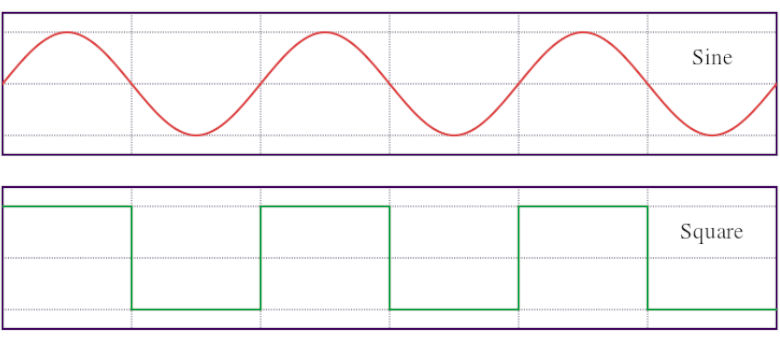

In [8]:
IPython.display.Audio(
    data=get_freq_array_for_scale(
        get_scale_frequencies(
            get_note_number("C", "1-line"), 
            MAJOR_SCALE_PATTERN
        ),
        SineOscillator
    ), 
    rate=SAMPLE_RATE, 
    autoplay=True
)

In [9]:
IPython.display.Audio(
    data=get_freq_array_for_scale(
        get_scale_frequencies(
            get_note_number("C", "1-line"), 
            MAJOR_SCALE_PATTERN
        ),
        SquareOscillator
    ), 
    rate=SAMPLE_RATE, 
    autoplay=True
)

In [10]:
IPython.display.Audio(
    data=get_freq_array_for_scale(
        get_scale_frequencies(
            get_note_number("C", "1-line"),
            MINOR_SCALE_PATTERN
        ),
        SineOscillator
    ), 
    rate=SAMPLE_RATE, 
    autoplay=True
)

In [11]:
def fft_plot(audio, sample_rate, max_display_freq=1000):
    n = len(audio)
    T = 1 / sample_rate
    yf = scipy.fft.fft(audio)
    xf = scipy.fft.fftfreq(n, T)
    plt.xlim((0, max_display_freq))
    plt.tight_layout()
    plt.plot(xf, 2 / n * np.abs(yf))

Frequency characteristics of sine wave generated octaves are nice and clean with only base note frequencies having a peak. In square wave we can observe many additional frequencies in the graph which means that square wave can be obtained with addition of multiple sine waves: 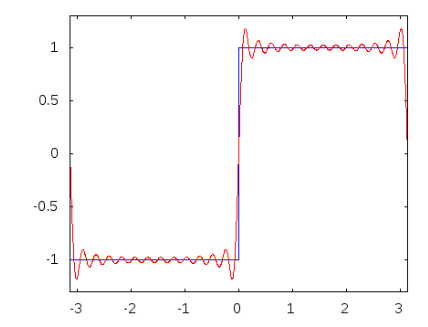

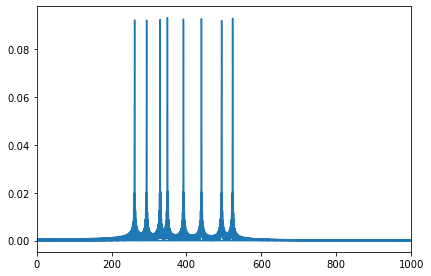

In [14]:
fft_plot(get_freq_array_for_scale(get_scale_frequencies(get_note_number("C", "1-line"), MAJOR_SCALE_PATTERN), SineOscillator), SAMPLE_RATE)

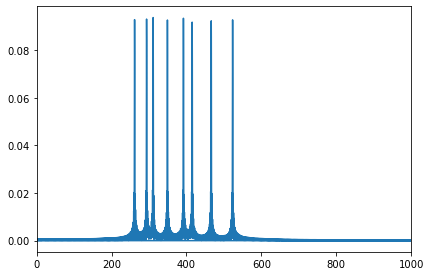

In [16]:
fft_plot(get_freq_array_for_scale(get_scale_frequencies(get_note_number("C", "1-line"), MINOR_SCALE_PATTERN), SineOscillator), SAMPLE_RATE)

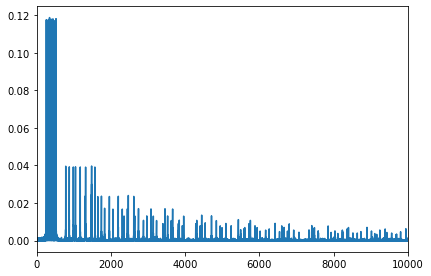

In [15]:
fft_plot(get_freq_array_for_scale(get_scale_frequencies(get_note_number("C", "1-line"), MAJOR_SCALE_PATTERN), SquareOscillator), SAMPLE_RATE, 10000)